# MNIST Digit Recognition

## Exploratory Data Analysis

In [122]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
df = pd.DataFrame(data)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
X = df.drop(['label'], axis =1) 
X.shape

(42000, 784)

In [6]:
y = df[['label']]
y.shape

(42000, 1)

In [7]:
df.isna().sum()  #### Checking Missing Values

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Applying KNN on dataset with PCA

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [97]:
### Splitting data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [95]:
X_train.shape

(31500, 784)

In [96]:
y_train.shape

(31500, 1)

In [98]:
##### Building the pipeline for model training


knn_pipe = Pipeline([
    ('scaler', StandardScaler()),   #### Scaling values
    ('pca', PCA(n_components=100)), #### Performing PCA, Considering 100 features
    ('knn_classifier', KNeighborsClassifier()) #### knn classifier as model
])

In [99]:
knn_pipe.fit(X_train, y_train)

C:\Users\marja\conda\envs\myapi\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100)),
                ('knn_classifier', KNeighborsClassifier())])

In [100]:
y_pred = knn_pipe.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9537142857142857

Accuracy of 95.37 obtained with traditional ML model

### Applying on Test dataset

In [102]:
data_test = pd.read_csv("../data/test.csv")

In [103]:
df_test = pd.DataFrame(data_test)

In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [105]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
y_hat = knn_pipe.predict(df_test)

In [107]:
y_hat

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

## CNN model 

In [108]:
#### Splitting into train and val data set to ensure callback during training

X_train_1,  x_val, y_train_1, y_val =  train_test_split(X_train, y_train, test_size= 0.2, random_state= 42)

In [109]:
##### COnverting each to numpy to resize to img size (28 x 28)

X_train_1 = X_train_1.to_numpy() 
x_val = x_val.to_numpy()
X_test = X_test.to_numpy()

In [110]:
print(X_train_1.shape)
print(x_val.shape)
print(X_test.shape)

(25200, 784)
(6300, 784)
(10500, 784)


In [112]:
#### Resizing to required img size

X_train_1 = X_train_1.reshape(25200, 28, 28, 1)
x_val = x_val.reshape(6300, 28, 28, 1)
X_test = X_test.reshape(10500, 28, 28, 1)

In [77]:
y_train_1 = y_train_1.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

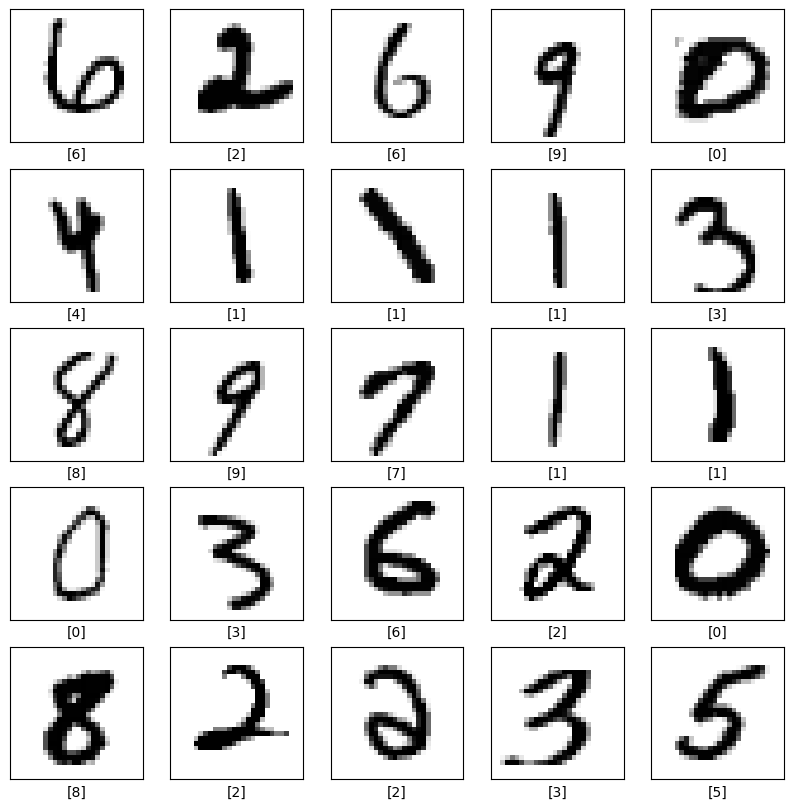

In [78]:
#### Example plots of the digits in the datasets

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_1[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_1[i])
plt.show()

In [113]:
# Normalizing the pixel value betwwen 0 and 1

X_train_1 = X_train_1 / 255.0
x_val = x_val / 255.0
X_test = X_test / 255.0

In [114]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten 

#### Defining a CNN model
#### activation function relu used

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', name='Convolution-1'))
model.add(MaxPooling2D(name='MaxPooling2D-1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='Convolution-2'))
model.add(MaxPooling2D(name='MaxPooling2D-2'))

#### Flatten the numpy array to 1D

model.add(Flatten())
model.add(Dense(128, activation='relu', name='Hidden-1'))
model.add(Dense(128, activation='relu', name='Hidden-2'))

#### Softmax activation for multiclass classification

model.add(Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convolution-1 (Conv2D)      (None, 26, 26, 32)        320       
                                                                 
 MaxPooling2D-1 (MaxPooling  (None, 13, 13, 32)        0         
 2D)                                                             
                                                                 
 Convolution-2 (Conv2D)      (None, 11, 11, 64)        18496     
                                                                 
 MaxPooling2D-2 (MaxPooling  (None, 5, 5, 64)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 Hidden-1 (Dense)            (None, 128)              

In [115]:
#### Using adam optimizer, and sparse categorical crossentropy as loss function.
#### Metric taken is the accuracy

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [89]:
from tensorflow.python.keras.callbacks import EarlyStopping

#### Defining early stopping criteria 

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [116]:
#### Epochs defined less since it was taking alot of time.
#### Batch size at random chosen to be 256.

history = model.fit(X_train_1, y_train_1, validation_data= [x_val, y_val], epochs= 8, batch_size= 256, callbacks= early_stopping)

Epoch 1/8
99/99 [==============================] - 5s 38ms/step - loss: 0.5350 - accuracy: 0.8446 - val_loss: 0.1570 - val_accuracy: 0.9519
Epoch 2/8
99/99 [==============================] - 4s 36ms/step - loss: 0.1180 - accuracy: 0.9643 - val_loss: 0.0919 - val_accuracy: 0.9719
Epoch 3/8
99/99 [==============================] - 3s 35ms/step - loss: 0.0779 - accuracy: 0.9751 - val_loss: 0.0763 - val_accuracy: 0.9757
Epoch 4/8
99/99 [==============================] - 3s 35ms/step - loss: 0.0590 - accuracy: 0.9821 - val_loss: 0.0691 - val_accuracy: 0.9808
Epoch 5/8
99/99 [==============================] - 4s 36ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0623 - val_accuracy: 0.9792
Epoch 6/8
99/99 [==============================] - 4s 36ms/step - loss: 0.0407 - accuracy: 0.9877 - val_loss: 0.0624 - val_accuracy: 0.9800
Epoch 7/8
99/99 [==============================] - 3s 35ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0553 - val_accuracy: 0.9840
Epoch 8/8
99/99 [===

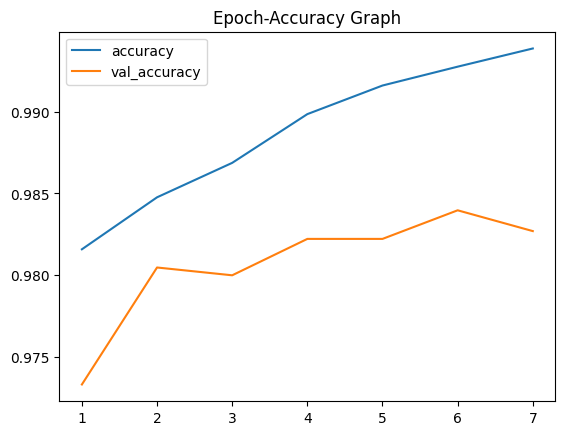

In [93]:
#### A graph of the accuracy with each epoch of traning and validation dataset

plt.title('Epoch-Accuracy Graph')
plt.xlabel = 'Epochs'
plt.ylabel = 'Loss'
plt.plot(range(1, len(history.epoch) + 1), history.history['accuracy'])
plt.plot(range(1, len(history.epoch) + 1), history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

### Test X_test on this model

In [125]:
y_pred_prob = model.predict(X_test)

329/329 [==============================] - 1s 3ms/step


In [126]:
#### Using argmax to convert the predicted probabilities into predicted classes.

y_pred_1_classes = np.argmax(y_pred_1_ prob, axis=1)

SyntaxError: invalid syntax (3208147702.py, line 3)

In [127]:
print(accuracy_score(y_pred_1_classes, y_test))

0.9835238095238096


### Accuracy obtained is 98.35% which is far more greater then the KNN model